# Visualizing Tokenization Patterns in LLMs
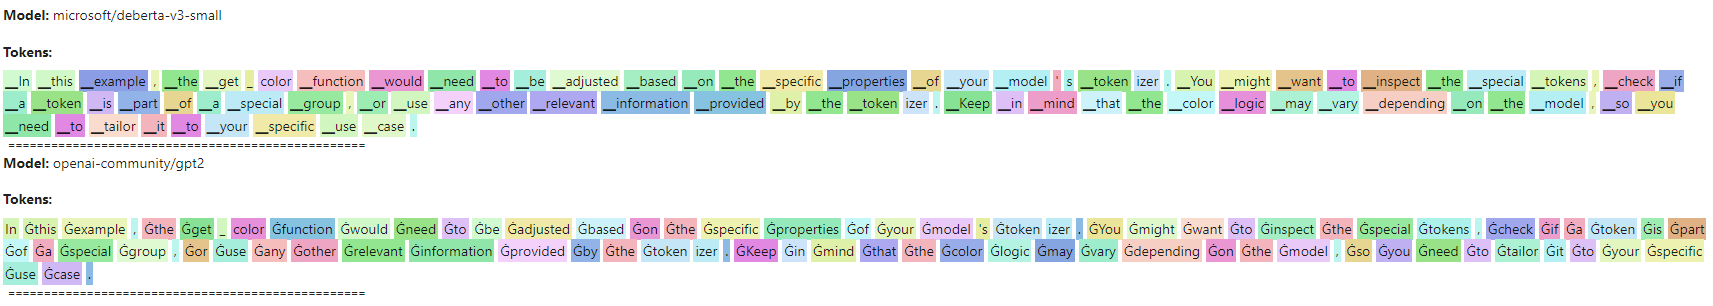

# Introduction
Tokenization is the process of breaking down a sequence of text into smaller units, known as tokens. Tokens are the building blocks used by language models like GPT to process and understand textual information.

## Token Types:
### Word-level Tokenization: 
Traditional tokenization at the word level involves breaking text into individual words. It is common for many NLP applications.
### Subword Tokenization: 
Subword tokenization breaks words into smaller components or subwords. This approach is helpful for handling rare words, morphologically rich languages, and improving model generalization.
### Byte Pair Encoding (BPE): 
BPE is a subword tokenization technique that iteratively merges the most frequent pairs of consecutive tokens, gradually building a vocabulary that adapts to the data's characteristics.

Resource to learn more about tokenization: https://huggingface.co/learn/nlp-course/chapter6/1?fw=pt

In this notebook, we'll look at how tokenization patterns differ between different models such as GPT-2, DistilGPT-2, DeBERTa-v3-small, and others.

# Instructions on how to use for your own experimentation

1. Insert a model from the Hugging Face library in `model_nm`: [Hugging Face Model Hub](https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads)
1. Change the text to test the tokenization patterns.

In [1]:
model_nm = ['microsoft/deberta-v3-small', 'openai-community/gpt2', 'distilbert/distilgpt2', 'mistralai/Mixtral-8x7B-Instruct-v0.1']

In [2]:
text = "In this example, the get_color function would need to be adjusted based on the specific properties of your model's tokenizer. \
You might want to inspect the special tokens, check if a token is part of a special group, \
or use any other relevant information provided by the tokenizer. \
Keep in mind that the color logic may vary depending on the model, \
so you need to tailor it to your specific use case."

# Visualization Toolkit

## Overview

The Tokenization Visualization Toolkit provides functions for visualizing tokenization patterns in language models.

## Functions

### `get_token_colors(text, tokenizer)`

This function analyzes input text using a specified tokenizer and assigns unique colors to each token. It returns a dictionary where keys are tokens, and values are corresponding colors.

### `display_colored_tokens(tokens, token_colors)`

Given a list of tokens and their assigned colors, this function generates a visually appealing representation in a Jupyter notebook, like the one we see at the start of this notebook. Each token is displayed with a colored background.

### `number_to_color(number)`

A utility function that generates a unique HSL color based on a numerical input. This ensures each token receives a distinct and visually distinguishable color for effective visualization.


In [3]:
# Generates a dictionary mapping unique texts/tokens with their corresponding color
def get_token_colors(text, tokenizer):
    tokens = tokenizer.tokenize(text)
    unique_tokens = list(set(tokens))
    token_colors = {token: number_to_color(index) for index, token in enumerate(unique_tokens)}
    return token_colors

# Displays the tokens with the unique color
def display_colored_tokens(tokens, token_colors):
    colored_text = ""
    for token in tokens:
        color = token_colors[token]
        colored_text += f'<span style="background-color: {color}; padding: 2px;">{token}</span> '

    display(HTML(colored_text))

# Generates a unique HSL color based on the index of the token
def number_to_color(number):
    golden_ratio_conjugate = 0.618033988749895
    a = 1664525
    c = 1013904223
    m = 2**32

    pseudorandom = (a * number + c) % m
    hue = ((pseudorandom * golden_ratio_conjugate) % 1) * 360
    s = 60 + (pseudorandom % 21)
    l = 70 + (pseudorandom % 21)

    return f"hsl({hue}, {s}%, {l}%)"

# Setup and Dependencies
Next, we import the necessary libraries:
- `transformers` for accessing pretrained language models.
- `IPython` for displaying HTML output.
- `json` for JSON manipulation.

In [4]:
# importing from huggingface transformers
from transformers import AutoTokenizer
from IPython.display import HTML, display
import json

# AutoTokenizer: Your Gateway to Language Models

## Overview

The `AutoTokenizer` is a powerful tool within the Hugging Face Transformers library that simplifies the process of working with a variety of language models. It serves as your gateway to effortlessly load and use pretrained tokenizers without worrying about the specific model's architecture.

## Functionality

## Initializing AutoTokenizer

To get started, simply use the `AutoTokenizer.from_pretrained(model_name)` method. This initializes a tokenizer based on the specified `model_name` from the Hugging Face Model Hub.

## Tokenizing Text

Once initialized, the `AutoTokenizer` can tokenize text with a single call to the `tokenizer.tokenize(text)` method. This process breaks down the input text into a sequence of tokens, a fundamental step in natural language processing (NLP).

## Special Tokens and Configurations

`AutoTokenizer` also handles special tokens, allowing you to easily add or modify tokens specific to your task. Additionally, it provides access to the model's configuration, letting you inspect and adjust various settings.

We iterate through all the models in `model_nm` and load up the AutoTokenizer for each to visualize the tokenization patterns for the every model.

In [5]:
# Display tokens with colors for each model
for model in model_nm:
    tokz = AutoTokenizer.from_pretrained(model)
    token_colors = get_token_colors(text, tokz)
    tokens = tokz.tokenize(text)
    
    display(HTML(f"<p><b>Model:</b> {model}</p><p><b>Tokens:</b>"))
    display_colored_tokens(tokens, token_colors)
    
    # Calculate and display the number of tokens and characters
    num_tokens = len(tokens)
    num_chars = len(text)
    print(f"Number of Tokens: {num_tokens}")
    print(f"Number of Characters: {num_chars}")
    print("="*50)

# Additional code for raw tokens
raw_tokens = [tokz.tokenize(text) for tokz in [AutoTokenizer.from_pretrained(model) for model in model_nm]]
raw_tokens_json = json.dumps(raw_tokens, indent=2)
print(f"Raw Tokens: {raw_tokens_json}")

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Number of Tokens: 85
Number of Characters: 400


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of Tokens: 84
Number of Characters: 400


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Number of Tokens: 84
Number of Characters: 400


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Number of Tokens: 86
Number of Characters: 400
Raw Tokens: [
  [
    "\u2581In",
    "\u2581this",
    "\u2581example",
    ",",
    "\u2581the",
    "\u2581get",
    "_",
    "color",
    "\u2581function",
    "\u2581would",
    "\u2581need",
    "\u2581to",
    "\u2581be",
    "\u2581adjusted",
    "\u2581based",
    "\u2581on",
    "\u2581the",
    "\u2581specific",
    "\u2581properties",
    "\u2581of",
    "\u2581your",
    "\u2581model",
    "'",
    "s",
    "\u2581token",
    "izer",
    ".",
    "\u2581You",
    "\u2581might",
    "\u2581want",
    "\u2581to",
    "\u2581inspect",
    "\u2581the",
    "\u2581special",
    "\u2581tokens",
    ",",
    "\u2581check",
    "\u2581if",
    "\u2581a",
    "\u2581token",
    "\u2581is",
    "\u2581part",
    "\u2581of",
    "\u2581a",
    "\u2581special",
    "\u2581group",
    ",",
    "\u2581or",
    "\u2581use",
    "\u2581any",
    "\u2581other",
    "\u2581relevant",
    "\u2581information",
    "\u2581provided",
    "\u2581by"

# References

- Practical Deep Learning for Coders: [Lesson 3 Neural net foundations](https://course.fast.ai/Lessons/lesson3.html/)
- Hugging Face Transformers Documentation: [https://huggingface.co/transformers/](https://huggingface.co/transformers/)
- OpenAI GPT-2 Model: [https://openai.com/models/gpt-2/](https://openai.com/models/gpt-2/)

# Acknowledgements

- Special thanks to [Jeremy Howard](https://www.kaggle.com/jhoward) for creating a wonderful resource to study deep learning, and to [William Berglund](https://github.com/functorism) for the inspiration behind visualization toolkit.